# 1) Conversion of DNA fasta file to sounds 

Extraction of DNA sequence from fasta file

In [1]:
#import sys
#fasta_sequence = sys.argv[1]
#open_fasta_sequence = open (fasta_sequence , "r")

#usage of example fasta intead of sys.argv calling: 
open_fasta_sequence = open('/projects/djmm/spa/my_music.fasta', "r")

DNA_sequence = ''

for line in open_fasta_sequence:
    line = line.rstrip()
    if not line.startswith('>'):
        DNA_sequence +=line

Conversion of nucleotide codons to amino acid: stop codon was assigned Z

In [20]:
import re
from pydub import AudioSegment
from pydub.playback import play
import pysynth_b as ps


class NotDNAError(Exception):
    pass

nt_to_codon_dict = {'TTT':'F1', 'TTC':'F2', 'TTA':'L1', 'TTG':'L2', 'CTT':'L3', 'CTC':'L4', 'CTA':'L5', 'CTG':'L6', 'ATT':'I1', 'ATC':'I2', 'ATA':'I3', 'ATG':'M',  'GTT':'V1', 'GTC':'V2', 'GTA':'V3', 'GTG':'V4', 'TCT':'S1','TCC':'S2', 'TCA':'S3', 'TCG':'S4', 'AGT':'S5', 'AGC':'S6', 'CCT':'P1', 'CCC':'P2', 'CCA':'P3', 'CCG':'P4','ACT':'T1','ACC':'T2', 'ACA':'T3', 'ACG':'T4', 'GCT':'A1', 'GCC':'A2', 'GCA':'A3', 'GCG':'A4', 'TAT':'Y1', 'TAC':'Y2', 'TAA':'Z1', 'TAG':'Z2', 'TGA':'Z3', 'CAT':'H1', 'CAC':'H2', 'CAA':'Q1','CAG':'Q2', 'AAT':'N1', 'AAC':'N2', 'AAA':'K1', 'AAG':'K2', 'GAT':'D1', 'GAC':'D2', 'GAA':'E1', 'GAG':'E2', 'TGT':'C1', 'TGC':'C2', 'TGG':'W', 'CGT':'R1', 'CGC':'R2', 'CGA':'R3', 'CGG':'R4', 'AGA':'R5', 'AGG':'R6', 'GGT':'G1', 'GGC':'G2', 'GGA':'G3', 'GGG':'G4'}

Conversion of amino acids to notes: This dictionary accounts for amino acid frequency. Most frequent AA is on the white keys. http://www.tiem.utk.edu/~gross/bioed/webmodules/aminoacid.htm

In [3]:
codon_to_key_dict = {'R1':'1','R2':'1', 'R3':'1', 'R4':'2', 'R5':'2', 'R6':'2', 'F1':'3', 'F2':'4', 'N1':'5', 'N2':'6', 'P1':'7', 'P2':'7', 'P3':'8', 'P4':'8','D1':'9', 'D2':'10', 'C1':'11', 'C2':'12', 'S1':'13', 'S2':'13', 'S3':'13', 'S4':'14', 'S5':'14', 'S6':'14', 'Q1':'15', 'Q2':'16', 'T1':'17', 'T2':'17','T3':'18', 'T4':'18', 'E1':'19', 'E2':'20', 'W':'21', 'W':'22', 'G1':'23', 'G2':'23', 'G3':'24', 'G4':'24', 'H1':'25', 'H2':'26', 'Y1':'27', 'Y2':'28', 'I1':'29', 'I2':'29','I3':'30', 'V1':'31', 'V2':'31','V3':'32', 'V4':'32', 'L1':'33', 'L2':'33', 'L3':'33', 'L4':'34', 'L5':'34', 'L6':'34', 'K1':'35', 'K2':'36', 'Z1':'37', 'Z2':'37', 'Z3':'38', 'M':'39', 'M':'40', 'A1':'41', 'A2':'41', 'A3':'42', 'A4':'42'}

Keys are assigned a numeric value. the '2' version of each key is designated as the half note

In [4]:
key_dict = {'1':'C', '2':'C2', '3':'C#', '4':'C#2', '5':'D', '6':'D2', '7':'D#', '8':'D#2', '9':'E', '10':'E2', '11':'F', '12':'F2', '13':'F#', '14':'F#2', '15':'G', '16':'G2', '17':'G#', '18':'G#2', '19':'A', '20':'A2', '21':'A#', '22':'A#2', '23':'B', '24':'B2', '25':'C3', '26':'C4', '27':'C#3', '28':'C#4', '29':'D3', '30':'D4', '31':'D#3', '32':'D#4',  '33':'E3', '34':'E4', '35':'F3', '36':'F4', '37':'F#3', '38':'F#4', '39':'G3', '40':'G4', '41':' ', '42':' 2'}

Try sequence to ensure it contains only ATGC, otherwise throw error

In [5]:
try:
    if re.findall(r'[^ATGC]', DNA_sequence):
        raise NotDNAError('non-ATGC characters found')
except NotDNAError:
    print('Non-ATGC characters found')
    exit

Conversion of amino acids into musical notes

In [6]:
#Find all codons, frame 1
codons = re.findall(r'(.{3})', DNA_sequence)

#Create a list of amino acids (AA) for each codon
AA_list = []
for codon in codons:
    AA = nt_to_codon_dict[codon]
    AA_list.append(AA)

#Convert the amino acids into numbers
num_list = []    
for AA in AA_list:
    nums = codon_to_key_dict[AA]
    num_list.append(nums)

#Convert the numbers into musical notes
keynotes = []    
for num in num_list:
    key = key_dict[num]
    keynotes.append(key)

Starting the Audio Playback section - from a list of musical notes to sound output

In [7]:
song = []

#For every note
for note in keynotes:
	note = note.lower()
	if " 2" == note:		#If the note is a halfnote rest
		value = ['r',4]		#convert to notation that pysynth understands
		song.append(value)	#Add note into the song

	elif "2" in note:		#If the note is a halfnote
		note_letter = re.search(r"([A-Za-z]+#?)\d?", note)	#Take only the letter +/- # or b
		value = [note_letter.group(1),4]
		song.append(value)

	elif "4" in note:		#If the note is a halfnote an octave highter
		note_letter = re.search(r"([A-Za-z]+#?)\d?", note)
		value = [note_letter.group(1)+"5",4]
		song.append(value)

	elif "3" in note:		#If the note is a whole note an octave higher
		note_letter = re.search(r"([A-Za-z]+#?)\d?", note)
		value = [note_letter.group(1)+"5",2]
		song.append(value)

	elif " " in note:		#If the note is a whole rest
		value = ['r',2]
		song.append(value)

	else:				#The only remaining option is a whole note
		note_letter = re.search(r"([A-Za-z]+#?)\d?", note)
		value = [note_letter.group(1),2]
		song.append(value)

# 2) Play music output

Use pysynth to create a music output file

In [8]:
ps.make_wav(song, fn = "DNA_to_Music.wav", bpm = 360)
print("DNA_to_Music.wav file created!")

Writing to file DNA_to_Music.wav
[1/65]	
[5/65]	
[9/65]	
[13/65]	
[17/65]	
[21/65]	
[25/65]	
[29/65]	
[33/65]	
[37/65]	
[41/65]	
[45/65]	
[49/65]	
[53/65]	
[57/65]	
[61/65]	
[65/65]	

DNA_to_Music.wav file created!


Use Pydub to play the wav file generated

In [9]:
sound_file = "DNA_to_Music.wav"
#sound = AudioSegment.from_file(sound_file, format="wav")
#play(sound)

import IPython
IPython.display.Audio("DNA_to_Music.wav")


# 3) PCA to determine genre that DNA might relate to

### 3.1) Dictionaries containing counts of nt and aa   

Opening of fasta file input and creation of dictionaries 

Combine input fasta file with music reference fasta files 

In [10]:
! cat my_music.fasta music_reference.fasta > combined_DNA.fasta

In [11]:
open_fasta_sequence = open('/projects/djmm/spa/combined_DNA.fasta', "r")

nucleotide_dict = {}
nucleotide_comp = {}
amino_acid_comp ={}
seq_id = ''
final_dict ={}

Dictionary with nucleotide counts

In [12]:
import re

for line in open_fasta_sequence:
    line = line.rstrip()
    if line.startswith('>'):
        for (seq_id, year, genre) in re.findall(r'>(\S+)\s(\d+)\s(\w+)', line):
            nucleotide_dict[seq_id] = ''
    else:
        if seq_id in nucleotide_dict:
            nucleotide_dict[seq_id] += line
        else:
            nucleotide_dict[seq_id] = line

#create a dictioary with nucleotide count
for seq_id in nucleotide_dict:
    sequence = nucleotide_dict[seq_id]
    a_count = sequence.count('A')
    c_count = sequence.count('C')
    g_count = sequence.count('G')
    t_count = sequence.count('T')
    nucleotide_comp[seq_id] = {'nucA':a_count,'nucC':c_count,'nucG':g_count,'nucT':t_count}

{'GeneX': {'nucA': 40, 'nucC': 72, 'nucG': 51, 'nucT': 34}, 'Tennessee_hayride': {'nucA': 54, 'nucC': 45, 'nucG': 47, 'nucT': 54}, 'Rainbow': {'nucA': 79, 'nucC': 60, 'nucG': 51, 'nucT': 10}, 'Temptation': {'nucA': 74, 'nucC': 44, 'nucG': 49, 'nucT': 32}, 'Beat': {'nucA': 39, 'nucC': 34, 'nucG': 84, 'nucT': 37}, 'Bounce': {'nucA': 80, 'nucC': 42, 'nucG': 59, 'nucT': 15}, 'House': {'nucA': 45, 'nucC': 71, 'nucG': 47, 'nucT': 39}, 'Fonda': {'nucA': 39, 'nucC': 51, 'nucG': 68, 'nucT': 42}, 'Roots': {'nucA': 34, 'nucC': 50, 'nucG': 55, 'nucT': 61}, 'Triumph': {'nucA': 59, 'nucC': 9, 'nucG': 90, 'nucT': 35}, 'Imperial': {'nucA': 63, 'nucC': 75, 'nucG': 46, 'nucT': 21}, 'Panther': {'nucA': 86, 'nucC': 15, 'nucG': 80, 'nucT': 16}, 'River': {'nucA': 56, 'nucC': 55, 'nucG': 44, 'nucT': 49}, 'Baby': {'nucA': 53, 'nucC': 44, 'nucG': 56, 'nucT': 47}, 'BadRomance': {'nucA': 63, 'nucC': 56, 'nucG': 43, 'nucT': 38}, 'Shake': {'nucA': 39, 'nucC': 43, 'nucG': 55, 'nucT': 63}, 'Pour_Sugar': {'nucA': 47,

Dictinoary with amino acid composition

In [13]:
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis

for seq_id in nucleotide_dict:
    sequence = nucleotide_dict[seq_id]
    seqobj = Seq(sequence)
    seq_str=str(seqobj)
    protein = seqobj.translate()
    prot_str = str(protein)
    amino_acid_comp[seq_id] = prot_str


for seq_id in amino_acid_comp:
    prot_str = amino_acid_comp[seq_id]
    prot_obj = ProteinAnalysis(prot_str)
    count_aa = prot_obj.count_amino_acids()
    amino_acid_comp[seq_id] = count_aa

/usr/local/anaconda/lib/python3.7/site-packages/Bio/Seq.py:2576: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning)


Dictionary with genre

In [14]:
genre_dict = {}

open_fasta_sequence = open('/projects/djmm/spa/combined_DNA.fasta', "r")

for line in open_fasta_sequence:
    line = line.rstrip()
    if line.startswith('>'):
        for (seq_id, year, genre) in re.findall(r'>(\S+)\s(\d+)\s(\w+)', line):
            genre_dict[seq_id] = genre

### 3.2) Dataframes containing nt and aa counts of DNA and genre of song 

In [15]:
import pandas as pd
import numpy as np

aa_df = pd.DataFrame.from_dict(amino_acid_comp)
nt_df = pd.DataFrame.from_dict(nucleotide_comp)
genre_df = pd.Series(genre_dict).to_frame().transpose()
genre_df = genre_df.rename({0: 'genre'}, axis='index')

seq_df = pd.concat([aa_df, nt_df, genre_df]).transpose()

                   A   C   D   E   F   G   H  I  K  L      ...        S   T  \
GeneX              2   0   2   1   0   7   0  4  0  7      ...        0  15   
Tennessee_hayride  2   6   6   8   3   4   0  0  0  0      ...        8   7   
Rainbow            2   0   1   1   0   2   0  0  0  1      ...        0   6   
Temptation         5   3   1   8   0   3   0  0  0  0      ...        6   7   
Beat               6   4   4   4   3   9   1  0  0  1      ...        5   2   
Bounce             1   0   1   9   0   7   2  0  0  0      ...        0   2   
House              5   5   9   3   5   7   9  0  0  0      ...        4  11   
Fonda              7  12  10   2   2   5   2  0  0  0      ...        7   4   
Roots              5  22   2   1   5   0   1  0  1  0      ...        3   7   
Triumph            0   0   2   0   0  26   0  0  0  0      ...        3   1   
Imperial           2   2   3   2   1   0   0  0  0  0      ...        6   4   
Panther            2   1   0  40   0   2   0  0  0  

### 3.3) Calculation and plotting of principal components 

Standardization of data frame onto unit scale (mean=0, variance=1)

In [16]:
from sklearn.preprocessing import StandardScaler

features = list(seq_df)
features.remove('genre')

x = seq_df.loc[:, features].values
y = seq_df.loc[:,['genre']].values

x_stand = StandardScaler().fit_transform(x)

[[2 0 2 1 0 7 0 4 0 7 2 1 8 5 6 0 15 5 0 0 40 72 51 34]
 [2 6 6 8 3 4 0 0 0 0 0 3 5 4 4 8 7 0 6 0 54 45 47 54]
 [2 0 1 1 0 2 0 0 0 1 0 0 0 29 24 0 6 0 0 0 79 60 51 10]
 [5 3 1 8 0 3 0 0 0 0 0 15 1 7 1 6 7 0 8 1 74 44 49 32]
 [6 4 4 4 3 9 1 0 0 1 3 3 1 1 11 5 2 0 6 0 39 34 84 37]
 [1 0 1 9 0 7 2 0 0 0 2 9 0 24 8 0 2 0 0 0 80 42 59 15]
 [5 5 9 3 5 7 9 0 0 0 0 2 6 0 0 4 11 1 0 0 45 71 47 39]
 [7 12 10 2 2 5 2 0 0 0 0 0 2 5 6 7 4 0 2 0 39 51 68 42]
 [5 22 2 1 5 0 1 0 1 0 0 2 1 2 13 3 7 0 1 0 34 50 55 61]
 [0 0 2 0 0 26 0 0 0 0 1 22 1 0 3 3 1 0 0 2 59 9 90 35]
 [2 2 3 2 1 0 0 0 0 0 0 0 11 35 2 6 4 0 0 0 63 75 46 21]
 [2 1 0 40 0 2 0 0 0 2 0 11 2 3 1 1 0 0 0 0 86 15 80 16]
 [2 5 3 1 4 6 11 0 3 0 1 7 3 2 5 2 6 1 3 1 56 55 44 49]
 [1 1 2 0 1 2 2 1 2 2 3 0 2 7 16 8 3 1 7 3 53 44 56 47]
 [1 8 7 3 4 3 0 2 0 1 0 16 7 1 3 3 2 2 3 0 63 56 43 38]
 [3 8 8 2 4 5 3 0 0 0 1 4 4 3 4 6 4 1 6 0 39 43 55 63]
 [1 3 3 7 10 4 0 0 0 0 2 7 5 0 6 2 6 0 9 0 47 45 59 48]
 [1 0 1 3 0 0 1 2 0 0 1 15 5 28 0 6 0 0 0 3 8

/usr/local/anaconda/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Calculation of principal components

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_stand)

principal_df = pd.DataFrame(data = pca_components
             , columns = ['PC1', 'PC2'], index = seq_df.index)

final_df = pd.concat([principal_df, seq_df[['genre']]], axis = 'columns')

                        PC1       PC2         genre
GeneX             -0.691067  6.191682         genre
Tennessee_hayride -1.451237 -0.652046       country
Rainbow            2.390845  1.262627       country
Temptation         1.066620 -1.015810       country
Beat              -0.720732 -2.320549    electronic
Bounce             3.253267 -0.281249    electronic
House             -3.055064  0.694485    electronic
Fonda             -2.513305 -1.519630        hiphop
Roots             -3.088164 -1.317250        hiphop
Triumph            3.215783 -3.142590        hiphop
Imperial           0.694533  2.316056  instrumental
Panther            4.157906 -1.669410  instrumental
River             -1.674547 -0.146762  instrumental
Baby              -0.041125  0.273048           pop
BadRomance        -0.514748  1.314314           pop
Shake             -2.628218 -1.107775           pop
Pour_Sugar        -1.408982 -1.207275          rock
Shook              3.134830  1.973717          rock
Not_takeit  

Plotting of PCA

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)

genres = ['genre', 'country', 'electronic', 'hiphop', 'instrumental', 'pop', 'rock']
colors = ['k','r', 'g', 'b', 'y', 'c', 'm']

for genre, color in zip(genres,colors):
    indicesToKeep = final_df['genre'] == genre
    ax.scatter(final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(genres)
ax.grid()

Saving and opening of PDF file with PCA graph

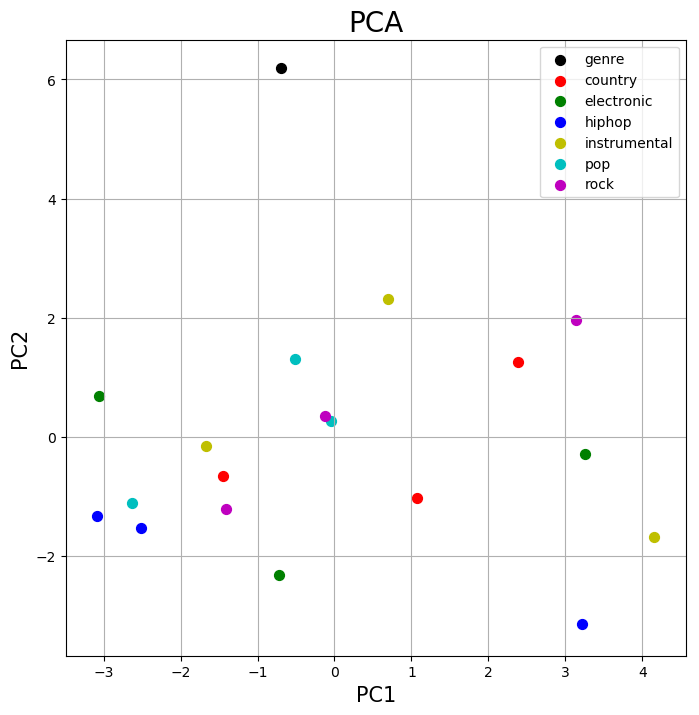

In [19]:
fig.savefig('PCA_DNA2music.png', bbox_inches='tight')

#import os
#dir_path = os.path.dirname(os.path.realpath('PCA_DNA2music.pdf'))
#print(dir_path)

#import webbrowser
#webbrowser.open_new(r'file:'+dir_path+'/PCA_DNA2music.pdf')

from IPython.display import Image

fig = Image(filename=('PCA_DNA2music.png'))
fig